In [1]:
import networkx as net
import urllib
import matplotlib.pyplot as plt
import pandas as pd
import nxviz as nv

In [2]:
g=net.DiGraph()

In [3]:
def clean_line(line):
    invalids = ['"', '\n']
    for n in invalids:
        line = line.replace(n, '')
        
    return line

def extract_data(file_loc, props):
    # Read in file
    file_obj = open(file_loc, "r",encoding="utf8")
    lines = file_obj.readlines()
    file_obj.close()
    

    #Takes the lines that were read in, does a split to create an array, then zips
    #with the props to create a 2d array, and then forms a dictionary from that 2d array,
    #and returns a list of those dictionaries.
    return list(map(lambda x: dict(zip(props, clean_line(x).split(","))), lines))
    

In [4]:
airport_props = [
        "airport_id",
        "name",
        "city",
        "country",
        "iata",
        "icao",
        "lat",
        "lon",
        "altitude",
        "timezone",
        "dst",
        "tz_database_time_zone",
        "type",
        "source"
]

route_props = [
        "airline",
        "airline_id",
        "source_airport",
        "source_airport_id",
        "destination_airport",
        "destination_airport_id",
        "codeshare",
        "stops",
        "equipment"
        ]

airlines_props = ["airline_id",
"name",
"alias",
"iata",
"icao",
"callsign",
"country",
"active"]

In [5]:
routes = extract_data("./data/routes.dat", route_props)
airports = extract_data("./data/airports.dat", airport_props)
airlines = extract_data('./data/airlines.dat',airlines_props)[1:]

In [6]:
routes_df = pd.DataFrame(routes)
airlines_df = pd.DataFrame(airlines)

In [7]:
routes_airline = routes_df.merge(airlines_df,left_on="airline_id",right_on="airline_id",how="inner")[['airline', 'airline_id', 'codeshare', 'destination_airport',
       'destination_airport_id', 'equipment', 'source_airport',
       'source_airport_id', 'stops','name','active']].to_dict(orient='records')

In [8]:
#Centrality

In [9]:
for airport in airports:
    g.add_node(airport['iata'], name= airport['name'], city= airport['city'], timezone = airport['timezone'], lat = airport['lat'], lon = airport['lon'])

In [10]:
for route in routes_airline:
    g.add_edge(route['source_airport'],route['destination_airport'], \
               stops =route['stops'],equipment=route['equipment'], airline_id =route['airline_id'], 
              name = route['name'], active =route['active'])

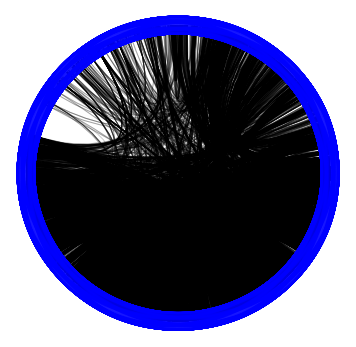

In [12]:
circos_plot = nv.CircosPlot(g)
circos_plot.draw()
plt.show()

In [13]:
def sorted_map(map1):
    ms = sorted(map1.items(), key =lambda k: -k[1])
    return ms

In [28]:
cs = net.closeness_centrality(g)
c = sorted_map(cs)
deg = net.degree(g)
d = sorted_map(deg)
bs = net.betweenness_centrality(g)
b = sorted_map(bs)

In [15]:
names1 = [x[0] for x in cs[:10]]
names2 = [x[0] for x in deg[:10]]
names3 = [x[0] for x in bs[:10]]

In [29]:
names = list(set(names1) | set(names2) | set(names3))

names

['FRA',
 'LHR',
 'LAX',
 'ANC',
 'ATL',
 'MUC',
 'ORD',
 'DXB',
 'YYZ',
 'DFW',
 'IST',
 'DME',
 'GRU',
 'AMS',
 'PEK',
 'CDG',
 'JFK']

In [32]:
table = [[name,cs[name], deg[name], bs[name]] for name in names]
table

[['FRA', 0.22530580536207856, 477, 0.016502896663361032],
 ['LHR', 0.2227969534989327, 342, 0.012089483271912414],
 ['LAX', 0.21781427402771053, 297, 0.02149552639408095],
 ['ANC', 0.16703706259602377, 68, 0.02243263553984442],
 ['ATL', 0.20491466434467123, 433, 0.00969141531898216],
 ['MUC', 0.21258210299205244, 380, 0.004995233585285815],
 ['ORD', 0.21211666626044962, 409, 0.015197170173136012],
 ['DXB', 0.22095167804683494, 369, 0.019545314899879186],
 ['YYZ', 0.21329645768345099, 293, 0.00963902043369885],
 ['DFW', 0.2043459624565033, 372, 0.008214264560896226],
 ['IST', 0.21366783863124572, 457, 0.01363551885875826],
 ['DME', 0.19230551920269348, 378, 0.00972697534586278],
 ['GRU', 0.19597023632579388, 182, 0.013059357838652228],
 ['AMS', 0.2196073049162708, 463, 0.013841615447505088],
 ['PEK', 0.2128278910634966, 412, 0.01608503439418929],
 ['CDG', 0.22398983083574858, 470, 0.020193625794939104],
 ['JFK', 0.21673712820065724, 322, 0.008437173479933653]]

In [ ]:
#Shortest Path

In [34]:
net.shortest_path(g, 'RDU','MAS')

['RDU', 'DFW', 'BNE', 'POM', 'MAS']

In [36]:
net.dijkstra_path(g, 'MAS','RDU')

['MAS', 'POM', 'BNE', 'LAX', 'RDU']

In [ ]:
# https://github.com/dgn2/DATA_620/blob/master/Assignments/W3/DATA620_HW3.ipynb